# Image Augmentations: what, why, & how

# _or_

# Transforming Images for 🤖 ROBOT Vision 🤖

### Jes Ford here 👋

I'm a senior data scientist at Recursion.

We take images of human cells to find cures for diseases.

I develop and train machine learning models to improve the image embeddings that we use to discover medicines.

I also _really_ like snowboarding (thats why I moved to Utah), have a PhD in physics, and run the local PyLadies Meetup.

In [ ]:
def my_talk():
    why = background()
    what = show_funny_cat_examples()
    how = practical_demo()
    🤯 = advanced_augmentations()

# Goal: we want models that generalize

i.e. avoid overfitting, perform well on completely new data

In [ ]:
# insert generic image of overfitting here

# Goal: we want models that generalize

i.e. avoid overfitting, perform well on completely new data

Many ways to prevent overfitting (including dropout, large learning rates, small batch sizes, weight decay...)

In this talk we focus on the <ins>**root cause**</ins> of the problem: access to <ins>**limited data**</ins>

- dropout randomly zeros out some of the activations forcing the network to learn robust features instead of focusing on specific neurons
- large LRs can excape local minima
- small batch sizes are noisy
- weight decay penalizes large weights (kinda analogous to L2 regularization but more complicated)

# Limited Data Problem #1: more is better

Models get better the more (good) training data you have

Labeled training data is expensive
- humans hand-labeling cats, hotdogs, airplanes...
- ImageNet has >14M images, labelled via [mechanical turk](https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/)...
- Medical images are costly, certain conditions are rare

# Limited Data Problem #2: invariants

Want models to be invariant to certain changes in the image (e.g. *translational invariance*)

<img src="https://i.stack.imgur.com/UKwFg.jpg">

# Solution: Image augmentations

2 distinct classes of augmentations:

- **basic image transformations** (focus of this talk)
- deep learning approaches (adversarial training, GAN augmentation, style transfer)

# Image Transformations

- geometric
- colorspace
- kernel filters
- random erasing
- mixing images

<img src="https://albumentations.ai/assets/img/custom/albumentations_logo.png" style="width: 100px;">

"Albumentations is a Python library for fast and flexible image augmentations. Albumentations efficiently implements a rich variety of image transform operations that are optimized for performance, and does so while providing a concise, yet powerful image augmentation interface for different computer vision tasks, including object classification, segmentation, and detection."  [https://albumentations.ai/](https://albumentations.ai/)

`pip install albumentations`

In [1]:
import albumentations as A

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show_img(img, figsize=(8, 8)):  # use this?
    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img)
    plt.imshow(img)

# Geometric transformations

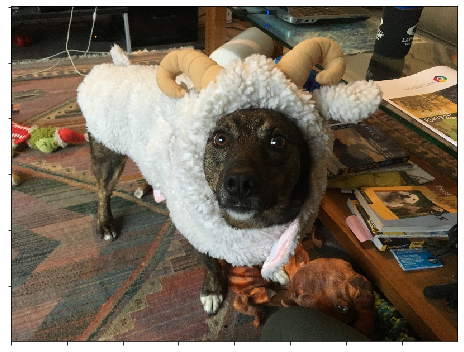

In [36]:
image = cv2.imread('images/toki_as_sheep.jpg')  # cute dog #1
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800, 600))

show_img(image)

# Geometric transformations

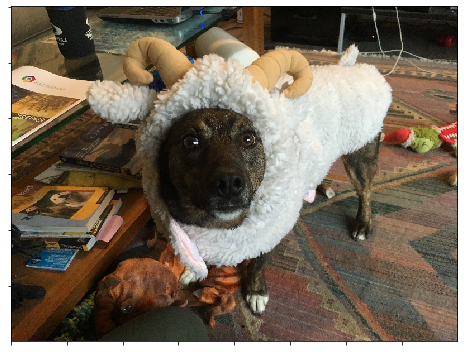

In [5]:
transform = A.HorizontalFlip(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

# Geometric transformations

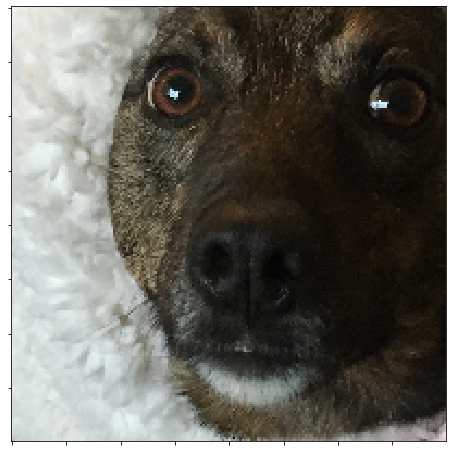

In [37]:
transform = A.CenterCrop(200, 200, p=1)  # can be practical
new_image = transform(image=image)['image']
show_img(new_image)

# Geometric transformations

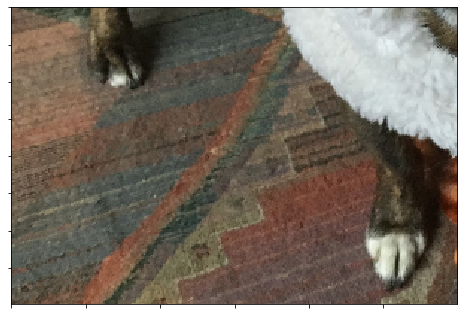

In [44]:
transform = A.RandomCrop(200, 300, p=1)
new_image = transform(image=image)['image']
show_img(new_image)

# Geometric transformations

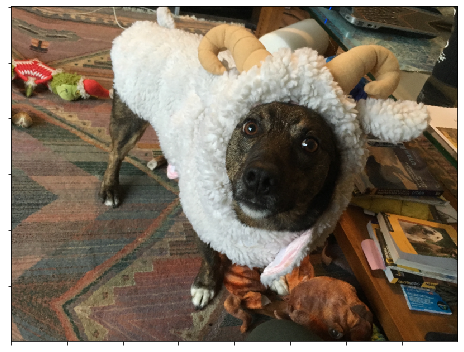

In [45]:
transform = A.ShiftScaleRotate(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

In [46]:
A.ShiftScaleRotate?

# Geometric transformations

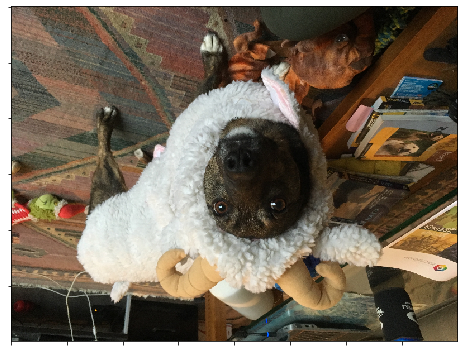

In [10]:
transform = A.VerticalFlip(p=1)  # does this make sense for use case?
new_image = transform(image=image)['image']
show_img(new_image)

# Geometric transformations

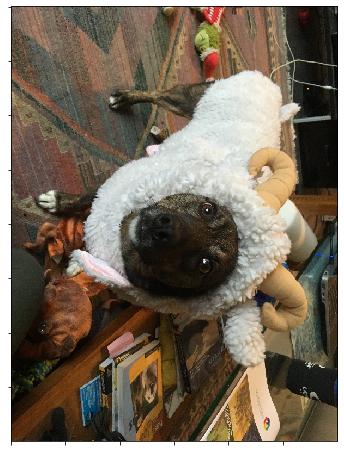

In [50]:
transform = A.RandomRotate90(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

# Geometric Transformations Summary

- flips: horizontal most common
- crops: random or center are common
- rotations: small angles common
- shifts/translations

$\rightarrow$ _What transforms make sense for my data? Do they preserve the label?_

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" style="width: 500px;">

# Colorspace Transformations

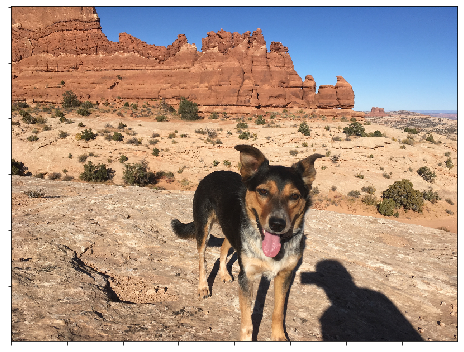

In [52]:
image = cv2.imread('images/kazu_in_moab.jpg')  # cute dog #2
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800, 600))

show_img(image)

# Colorspace Transformations

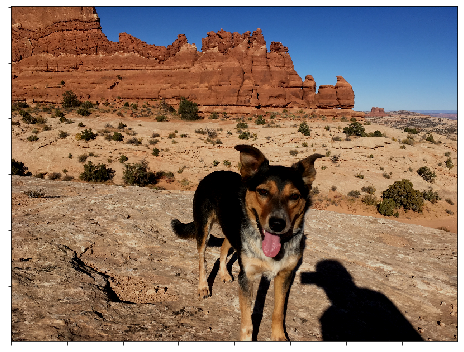

In [57]:
transform = A.RandomBrightness(limit=0.3, p=1)  # also check out RandomContrast
new_image = transform(image=image)['image']
show_img(new_image)

- Brightness: overall lightness/darkness of image (pixel values)
- Contrast: difference between lightest and darkest parts of image

- Hue: color, think colorwheel with random angle changes
- Saturation: brilliance of the color
- Value: the lightness/darkness of the color (think mixing with white, black paint)

# Colorspace Transformations

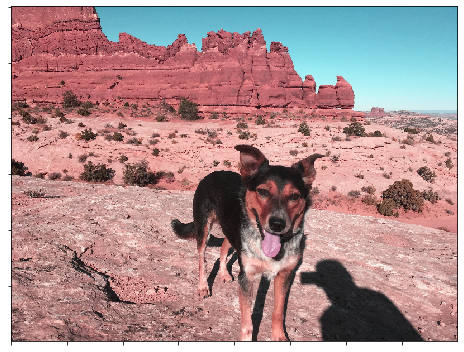

In [67]:
transform = A.HueSaturationValue(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

# Colorspace Transformations

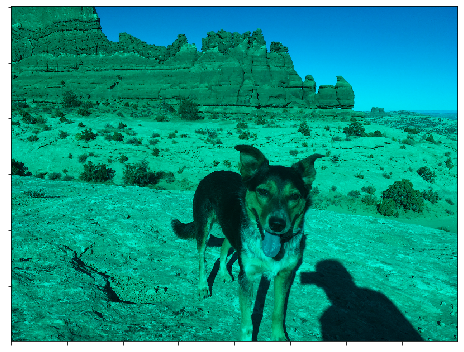

In [76]:
transform = A.ChannelDropout(p=1)  # zero out one of the 3 channels
new_image = transform(image=image)['image']
show_img(new_image)

In [77]:
new_image  # image shape: (600, 800, 3)

array([[[  0, 119,  86],
        [  0, 113,  83],
        [  0, 114,  85],
        ...,
        [  0, 113, 186],
        [  0, 108, 187],
        [  0, 110, 189]],

       [[  0, 115,  85],
        [  0, 116,  86],
        [  0, 113,  83],
        ...,
        [  0, 112, 187],
        [  0, 111, 190],
        [  0, 112, 191]],

       [[  0, 118,  89],
        [  0, 113,  82],
        [  0, 110,  80],
        ...,
        [  0, 114, 187],
        [  0, 113, 192],
        [  0, 112, 191]],

       ...,

       [[  0,  99,  80],
        [  0,  90,  77],
        [  0,  43,  29],
        ...,
        [  0, 142, 109],
        [  0, 154, 120],
        [  0, 146, 113]],

       [[  0, 113,  91],
        [  0, 148, 131],
        [  0, 119,  95],
        ...,
        [  0, 117,  93],
        [  0, 124,  98],
        [  0, 136, 107]],

       [[  0, 103,  86],
        [  0,  93,  75],
        [  0,  59,  47],
        ...,
        [  0, 127, 101],
        [  0, 127, 103],
        [  0, 119,  95]]

# Colorspace Transformations

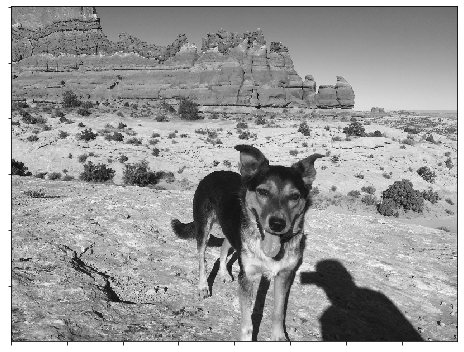

In [17]:
transform = A.ToGray(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

# Colorspace Transformations

Many options and room for creativity...

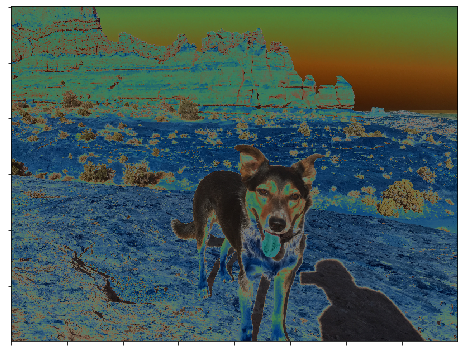

In [18]:
transform = A.Solarize(p=1)  # invert all pixel values above a threshold
new_image = transform(image=image)['image']
show_img(new_image)

# Kernel Filters

Blur or Sharpen images by applying a filter.

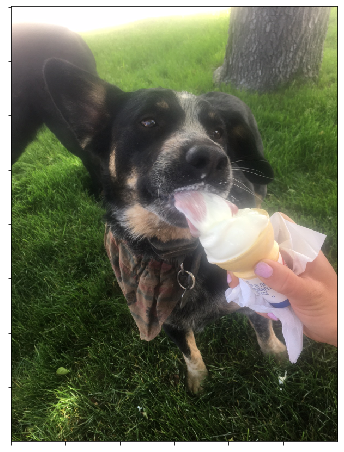

In [19]:
image = cv2.imread('images/gaucho_with_icecream.jpg')  # cute dog #3
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (600, 800))

show_img(image)

# Kernel Filters

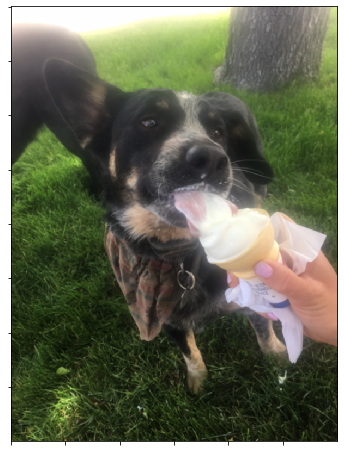

In [20]:
transform = A.GaussianBlur(p=1)  # see also A.MotionBlur
new_image = transform(image=image)['image']
show_img(new_image)

# Kernel Filters

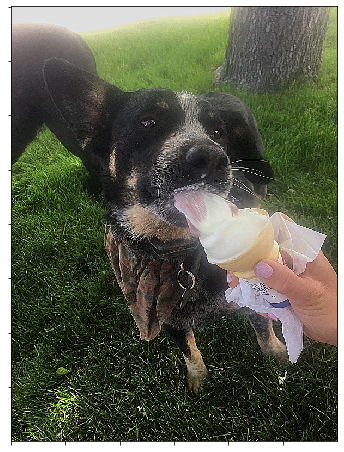

In [21]:
transform = A.imgaug.transforms.IAASharpen(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

# Kernel Filters Summary

- Blur or Sharpen images
- Similar to the inner working of a CNN: under the hood we are convolving the image with a NxN filter
- Gaussian noise filter (for standard blurring) or a horizontal or vertical edge filter (for sharpening)
- Good for making your model robust to action shots, especially if all your training images are of similar sharp quality

# Random Erasing

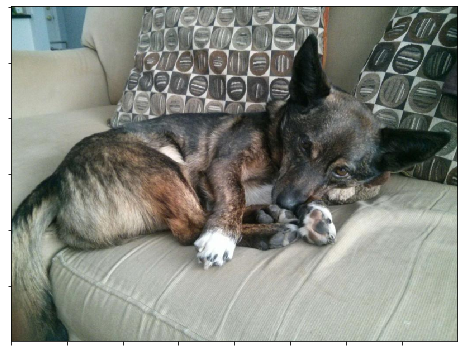

In [78]:
image = cv2.imread('images/couch_dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800, 600))

show_img(image)

# Random Erasing

Fill value defaults to 0, but can be customized.

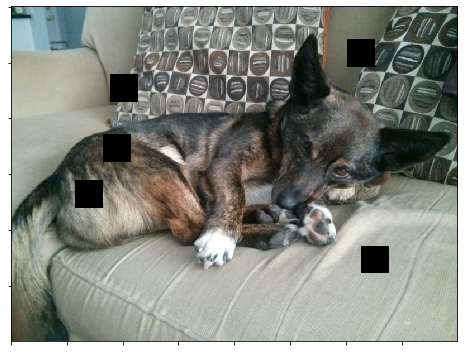

In [23]:
transform = A.Cutout(num_holes=5, max_h_size=50, max_w_size=50, p=1)
new_image = transform(image=image)['image']
show_img(new_image)

# Random Erasing

Fill value defaults to 0, but can be customized. Some results suggest random values are the best fill choice.

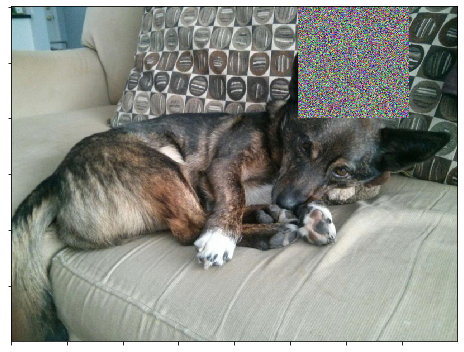

In [26]:
random_fill_values = np.random.randn(200, 200, 3) * image.std() + image.mean()

transform = A.Cutout(num_holes=1, max_h_size=200, max_w_size=200, p=1,
                     fill_value=random_fill_values)
new_image = transform(image=image)['image']
show_img(new_image)

# Random Erasing (aka Cutout) Summary

- Forces model to pay attention to the whole image, not a subset
- Helps overcome issues with occlusion or unclear parts of test images
- Inspired by Dropout\* but acts on the input data

$\rightarrow$ Careful: *this augmentation might not preserve the label!*

\* Dropout: regularization technique that zeros out a random fraction of weights in a neural network layer.

# Mixing Images

In [ ]:
# TODO: find good cat and dog images for this online
# explain this is different because its now operating on more than one image
# what will the label be? random selection of the two image labels? combination?

## A few more random built-in augmentations...

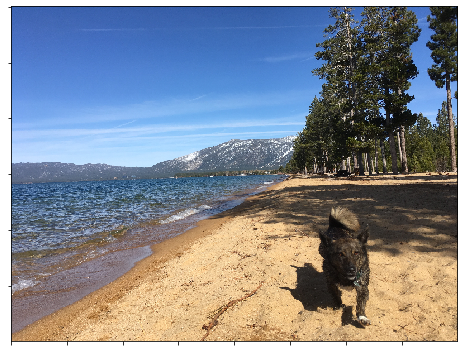

In [27]:
image = cv2.imread('images/toki_in_tahoe.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (800, 600))

show_img(image)

## A few more random built-in augmentations...

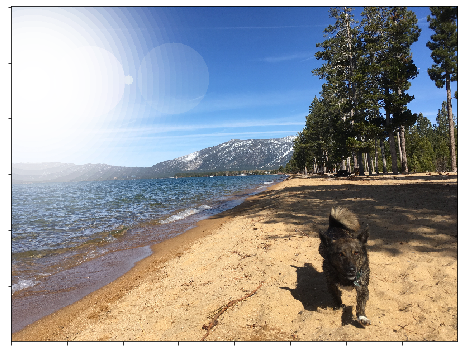

In [28]:
transform = A.RandomSunFlare(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

## A few more random built-in augmentations...

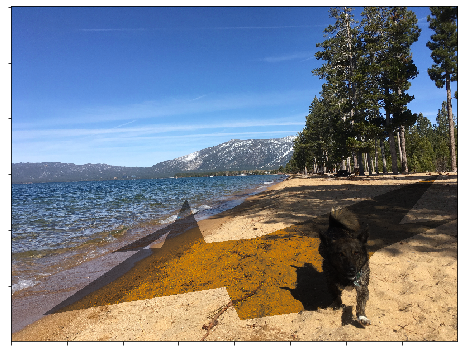

In [29]:
transform = A.RandomShadow(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

## A few more random built-in augmentations...

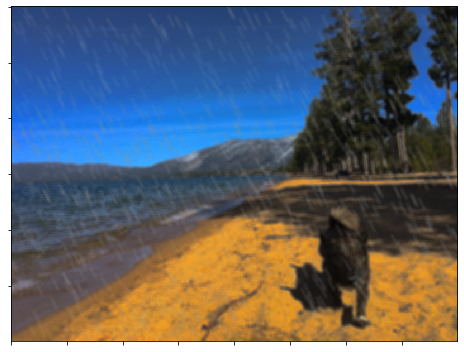

In [30]:
transform = A.RandomRain(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

## A few more random built-in augmentations...

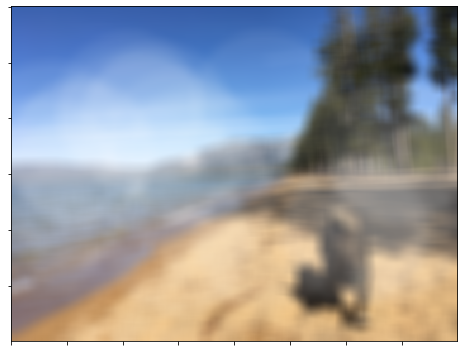

In [31]:
transform = A.RandomFog(p=1)
new_image = transform(image=image)['image']
show_img(new_image)

# Combining Augmentations

# RxRx1 Kaggle Competition...

In [ ]:
!ls images/